In [357]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import scipy.stats as ss
from wordcloud import WordCloud, STOPWORDS
sns.set()

In [503]:
ts1 = pd.read_csv('../data/Loan_training_set_1_4.csv', delimiter = ',', skiprows = 1, skipfooter = 2, engine = 'python')
ts1.shape

(105451, 151)

In [504]:
ts2 = pd.read_csv('../data/Loan_training_set_2_4.csv', delimiter = ',', skiprows = 1, skipfooter = 2, engine = 'python')
ts2.shape

(122701, 151)

In [505]:
ts3 = pd.read_csv('../data/Loan_training_set_3_4.csv', delimiter = ',', skiprows = 1, skipfooter = 2, engine = 'python')
ts3.shape

(235629, 151)

In [506]:
ts4 = pd.read_csv('../data/Loan_training_set_4_4.csv', delimiter = ',', skiprows = 1, skipfooter = 2, engine = 'python')
ts4.shape

(421095, 151)

In [507]:
loans = pd.concat([ts1, ts2, ts3, ts4])
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,112435993,NaN,2300,2300,2300.0,36 months,12.62%,77.08,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,112290210,NaN,16000,16000,16000.0,60 months,12.62%,360.95,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,112436985,NaN,6025,6025,6025.0,36 months,15.05%,209.01,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,112439006,NaN,20400,20400,20400.0,36 months,9.44%,652.91,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,112438929,NaN,13000,13000,13000.0,36 months,11.99%,431.73,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [508]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [509]:
loans = loans.drop(['collection_recovery_fee', 'funded_amnt', 'funded_amnt_inv', 'id', 'initial_list_status',
                    'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'next_pymnt_d',
                    'out_prncp', 'out_prncp_inv', 'recoveries', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
                    'total_rec_late_fee', 'total_rec_prncp', 'url', 'hardship_flag', 'hardship_type',
                    'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date',
                    'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status',
                    'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
                    'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 
                    'settlement_percentage', 'settlement_term', 'grade', 'sub_grade', 'pymnt_plan', 'mths_since_last_major_derog',
                    'policy_code', 'mo_sin_old_il_acct', 'desc'], axis = 1)


In [510]:
loans.shape

(884876, 103)

In [511]:
obj = loans.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

member_id , 884876
loan_amnt , 0
term , 0
int_rate , 0
installment , 0
emp_title , 52693
emp_length , 51193
home_ownership , 0
annual_inc , 0
verification_status , 0
loan_status , 0
purpose , 0
title , 132
zip_code , 0
addr_state , 0
dti , 261
delinq_2yrs , 0
earliest_cr_line , 0
fico_range_low , 0
fico_range_high , 0
inq_last_6mths , 0
mths_since_last_delinq , 431427
mths_since_last_record , 729776
open_acc , 0
pub_rec , 0
revol_bal , 0
revol_util , 489
total_acc , 0
last_fico_range_high , 0
last_fico_range_low , 0
collections_12_mths_ex_med , 0
application_type , 0
annual_inc_joint , 863558
dti_joint , 863560
verification_status_joint , 863558
acc_now_delinq , 0
tot_coll_amt , 0
tot_cur_bal , 0
open_acc_6m , 635352
open_act_il , 635352
open_il_12m , 635352
open_il_24m , 635352
mths_since_rcnt_il , 642103
total_bal_il , 635352
il_util , 668295
open_rv_12m , 635352
open_rv_24m , 635352
max_bal_bc , 635352
all_util , 635379
total_rev_hi_lim , 0
inq_fi , 635352
total_cu_tl , 635352
inq_l

In [512]:
loans = loans.drop(['member_id', 'addr_state', 'annual_inc_joint',
                   'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m',
                   'open_il_24m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
                   'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
                   'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
                   'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
                   'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
                   'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'title'], axis = 1)

In [513]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884876 entries, 0 to 421094
Data columns (total 73 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       884876 non-null  int64  
 1   term                            884876 non-null  object 
 2   int_rate                        884876 non-null  object 
 3   installment                     884876 non-null  float64
 4   emp_title                       832183 non-null  object 
 5   emp_length                      833683 non-null  object 
 6   home_ownership                  884876 non-null  object 
 7   annual_inc                      884876 non-null  float64
 8   verification_status             884876 non-null  object 
 9   loan_status                     884876 non-null  object 
 10  purpose                         884876 non-null  object 
 11  zip_code                        884876 non-null  object 
 12  addr_state      

Pasar `int_rate` y `revol_util` de formato objeto a númerico quitando los '%'.

In [514]:
loans['int_rate'] = loans.int_rate.str.strip('%').astype(float)

In [515]:
loans['revol_util'] = loans.revol_util.str.strip('%').astype(float)

In [516]:
loans['earliest_cr_line'] = pd.to_datetime(loans['earliest_cr_line'])
loans.earliest_cr_line

0        1985-09-01
1        1992-06-01
2        2002-06-01
3        2007-01-01
4        2002-02-01
            ...    
421090   2004-09-01
421091   1974-03-01
421092   2003-09-01
421093   2003-10-01
421094   2001-12-01
Name: earliest_cr_line, Length: 884876, dtype: datetime64[ns]

In [518]:
loans_num = loans.drop(['term','emp_title', 'emp_length', 'home_ownership', 'verification_status',
                     'purpose', 'zip_code',
                   'addr_state', 'application_type', 'disbursement_method'], axis = 1)
loans_num.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,2300,12.62,77.08,10000.0,Current,21.61,0,1985-09-01,700,704,...,0,1,100.0,100.0,0,0,7100,3911,3400,0
1,16000,12.62,360.95,94000.0,Current,25.61,0,1992-06-01,715,719,...,0,3,100.0,100.0,0,0,319900,44830,2400,16000
2,6025,15.05,209.01,46350.0,Current,8.88,0,2002-06-01,700,704,...,0,4,100.0,0.0,0,0,137700,12425,17600,0
3,20400,9.44,652.91,44000.0,Current,27.06,0,2007-01-01,760,764,...,0,2,100.0,0.0,0,0,103358,62335,44400,56458
4,13000,11.99,431.73,85000.0,Current,6.79,1,2002-02-01,660,664,...,1,0,41.7,100.0,0,0,19602,15332,7800,11802


<AxesSubplot:>

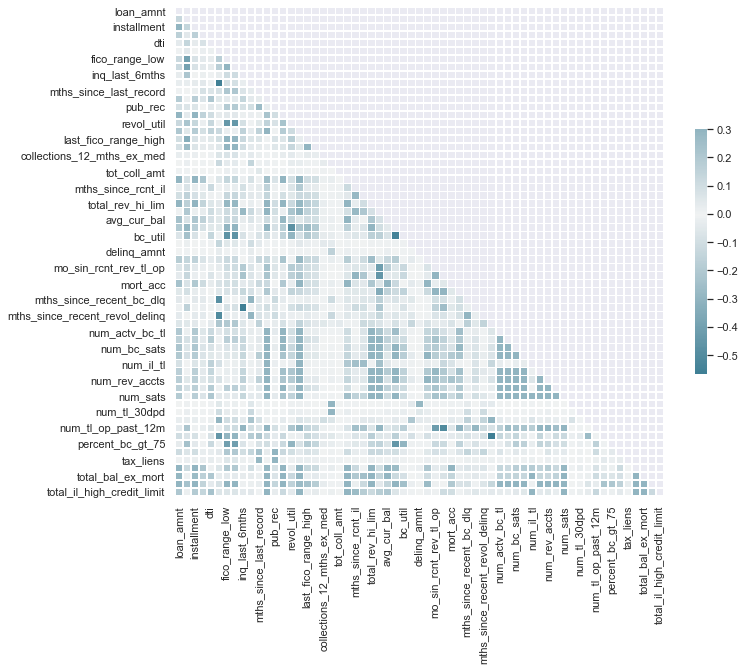

In [519]:
corr = loans_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(222, 222, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [520]:
loans_num = loans_num.drop(['delinq_2yrs', 'bc_util', 'inq_last_6mths'], axis = 1)
loans_num.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,fico_range_low,fico_range_high,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,2300,12.62,77.08,10000.0,Current,21.61,1985-09-01,700,704,NaN,...,0,1,100.0,100.0,0,0,7100,3911,3400,0
1,16000,12.62,360.95,94000.0,Current,25.61,1992-06-01,715,719,NaN,...,0,3,100.0,100.0,0,0,319900,44830,2400,16000
2,6025,15.05,209.01,46350.0,Current,8.88,2002-06-01,700,704,NaN,...,0,4,100.0,0.0,0,0,137700,12425,17600,0
3,20400,9.44,652.91,44000.0,Current,27.06,2007-01-01,760,764,NaN,...,0,2,100.0,0.0,0,0,103358,62335,44400,56458
4,13000,11.99,431.73,85000.0,Current,6.79,2002-02-01,660,664,16.0,...,1,0,41.7,100.0,0,0,19602,15332,7800,11802


<AxesSubplot:>

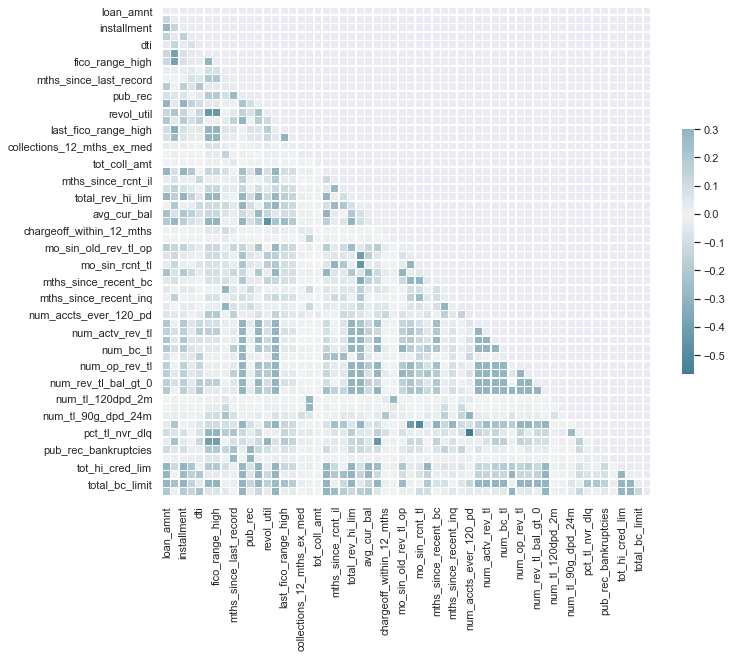

In [521]:
corr = loans_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(222, 222, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [522]:
loans = loans.drop(['delinq_2yrs', 'bc_util', 'inq_last_6mths'], axis = 1)

# EDA
## Análisis Univariante

## Variable dependiente: estado del préstamo

In [657]:
loans.loan_status.describe()

count      884876
unique          7
top       Current
freq       422685
Name: loan_status, dtype: object

Text(0.5, 0, 'Loan status')

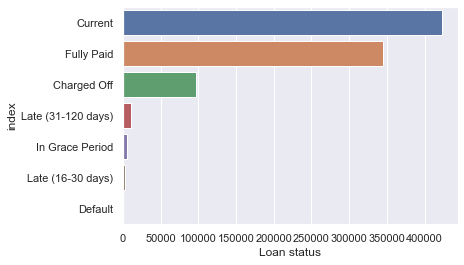

In [659]:
loan = loans['loan_status'].value_counts().reset_index(name = 'loan')

ax = sns.barplot(x= 'loan', y='index', data=loan)
ax.set_xlabel('Loan status')

### Cantidad del préstamo
La cantidad de dinero que pide el prestatario. Está recogido en la variable `loan_amnt`. La cantidad mínima es de 1.000um y la máxima es de 40.000um, mientras que la media se sitúa al rededor de los 15.000um. 

In [523]:
loans.loan_amnt.describe()

count    884876.000000
mean      14975.072016
std        8804.519267
min        1000.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

El __Coeficiente de Variación de Pearson__ es de __0,58__. La varianza es aceptable, aunque no llega a ser extremadamente representativa. 

In [524]:
cv = ss.variation(loans['loan_amnt'])
abs(cv)

0.5879447045853947

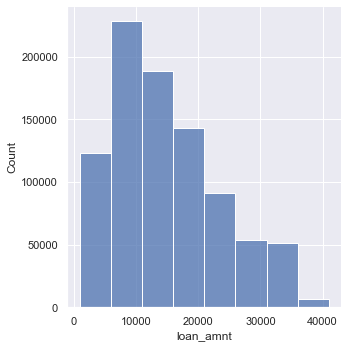

In [525]:
sns.displot(loans, x = loans['loan_amnt'], binwidth = 5000)

Como se puede apreciar en el gráfico, la mayoría de los préstamos se agrupan entre las __5.000 y las 20.000um__. 

### Meses en los que se completará el pago del préstamo
Se recoge en la variable `term` y es una variable binaria, ya que los préstamos son a 36 o a 60 meses.

Text(0.5, 1.0, 'Meses a pagar el préstamo')

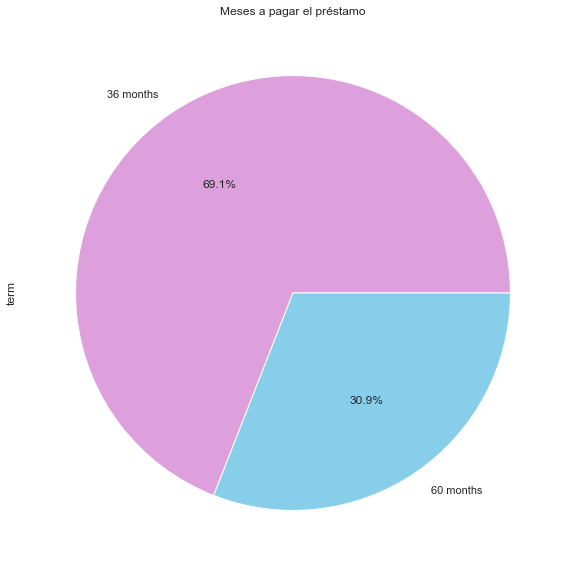

In [526]:
colors = ["plum", "skyblue"]

loans['term'].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', colors = colors)
plt.title('Meses a pagar el préstamo')


Como se puede apreciar en el gráfico circular, hay una clara __mayoría__ de préstamos que se pagan a __36 meses__, es decir a 3 años. 

### Tipo de interés del préstamo 
`int_rate`

El tipo de interés del préstamo va desde el 5,32% hasta el 30,99%, siendo su media un 13,11%.

In [527]:
loans.int_rate.describe()

count    884876.000000
mean         13.113816
std           4.611939
min           5.320000
25%           9.800000
50%          12.690000
75%          15.610000
max          30.990000
Name: int_rate, dtype: float64

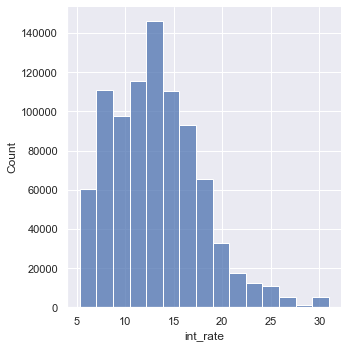

In [528]:
sns.displot(loans, x = loans['int_rate'], bins = 15)

### Pago mensual si se llega a originar el préstamo
`installment`

In [529]:
loans.installment.describe()

count    884876.000000
mean        440.549628
std         254.920865
min          14.010000
25%         256.870000
50%         378.200000
75%         580.730000
max        1719.830000
Name: installment, dtype: float64

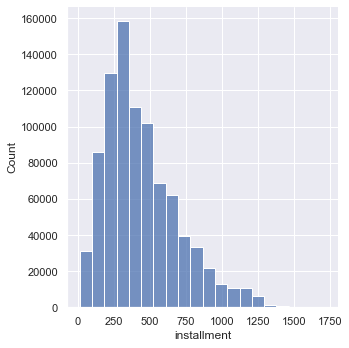

In [530]:
sns.displot(loans, x = loans['installment'], bins = 20)

### Empleo del solicitante
`emp_title`

In [531]:
loans['emp_title'] = loans['emp_title'].str.lower()
loans.emp_title.head(20)

0                            NaN
1                        teacher
2                   front office
3                        manager
4                      paramedic
5                        teacher
6                   office clerk
7               program director
8           solutions architect 
9             asst plant manager
10                           pse
11                       manager
12            department manager
13                    supervisor
14                           NaN
15      senior software engineer
16           executive assistant
17    regional practice director
18           physician assistant
19                     engineer 
Name: emp_title, dtype: object

In [532]:
loans['emp_title'].value_counts().head(20)

teacher               20802
manager               18809
owner                 12389
registered nurse       9538
supervisor             8549
driver                 8228
sales                  7888
rn                     7456
office manager         5817
project manager        5700
general manager        5274
truck driver           4565
director               4357
president              3939
engineer               3898
sales manager          3454
operations manager     3246
vice president         3188
police officer         3082
store manager          3013
Name: emp_title, dtype: int64

Text(0.5, 0, 'Los 20 trabajos más comunes')

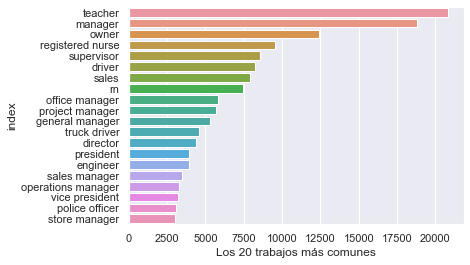

In [533]:
loans15 = loans['emp_title'].value_counts().head(20).reset_index(name = 'employment title')

ax = sns.barplot(x= 'employment title', y='index', data=loans15)
ax.set_xlabel('Los 20 trabajos más comunes')

### Tiempo que lleva trabajando el solicitante
`emp_length`
Se mimde en años, valores entre 0 y 10 donde 0 es menos de 1 año y 10 mas de 10 años

In [534]:
loans['emp_length'].value_counts()

10+ years    295633
2 years       78825
< 1 year      76177
3 years       69626
1 year        57074
4 years       52060
5 years       51603
8 years       40147
7 years       39884
6 years       38371
9 years       34283
Name: emp_length, dtype: int64

Text(0.5, 0, 'Tiempo en el trabajo')

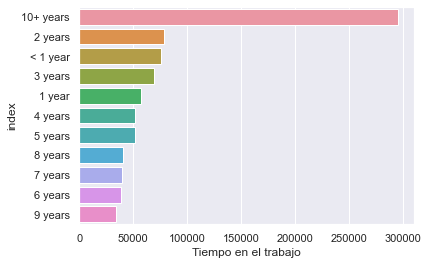

In [535]:
length = loans['emp_length'].value_counts().reset_index(name = 'length')

ax = sns.barplot(x= 'length', y='index', data=length)
ax.set_xlabel('Tiempo en el trabajo')

### Estado de la propiedad de la vivienda del solicitante 
`home_ownership` 

In [536]:
loans['home_ownership'].value_counts()

MORTGAGE    439600
RENT        350505
OWN          94752
ANY             16
NONE             3
Name: home_ownership, dtype: int64

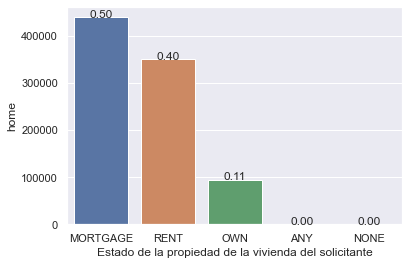

In [537]:
from matplotlib.pyplot import show


home = loans['home_ownership'].value_counts().reset_index(name = 'home')

total = float(len(loans.home_ownership))

ax = sns.barplot(x= 'index', y='home', data=home)
ax.set_xlabel('Estado de la propiedad de la vivienda del solicitante')
for p in ax.patches:
       height = p.get_height()
       ax.text(p.get_x()+p.get_width()/2.,
               height + 3,
               '{:1.2f}'.format(height/total),
               ha="center") 
show()

### Ingreso anual del solicitante
`annual_inc`

In [538]:
loans['annual_inc'] = loans.annual_inc/1000
# NO VOLVER A EJECUTAR ESTA LINEA!!!!!!!!!!

In [539]:
loans.annual_inc.describe()

count    884876.000000
mean         77.102415
std         135.491609
min           0.000000
25%          46.000000
50%          65.000000
75%          92.000000
max      110000.000000
Name: annual_inc, dtype: float64

AttributeError: 'FacetGrid' object has no attribute 'unique'

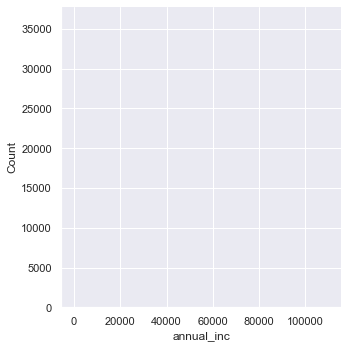

In [540]:
sns.displot(loans, x = loans['annual_inc']).unique()

### Verificación de la información proporcionada por el solicitante
`verification_status`

In [541]:
def cat(x):
    if x == "Not Verified":
        return "0"
    else:
        return "1"

In [542]:
loans['verification_status'] = loans.verification_status.map(cat) 

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

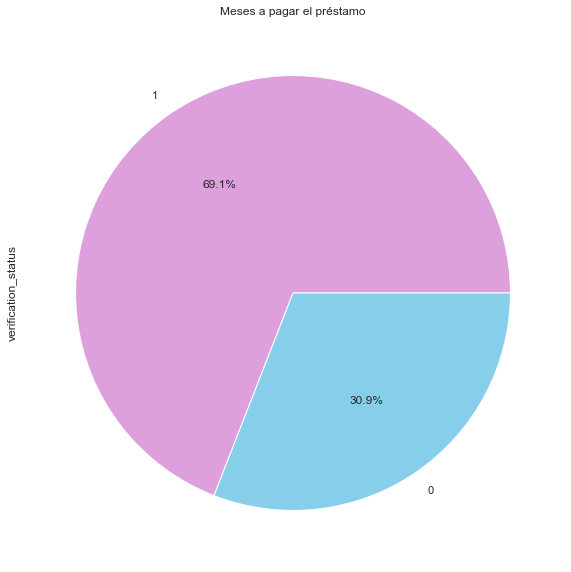

In [543]:
colors = ["plum", "skyblue"]

loans['verification_status'].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', colors = colors)
plt.title('Meses a pagar el préstamo')
plt.label()


### Finalidad del préstamo
`purpose`

In [ ]:
loans['purpose'].value_counts()

In [ ]:
length = loans['purpose'].value_counts().reset_index(name = 'purpose')

ax = sns.barplot(x= 'purpose', y='index', data=purpose)
ax.set_xlabel('Finalidad del préstamo')

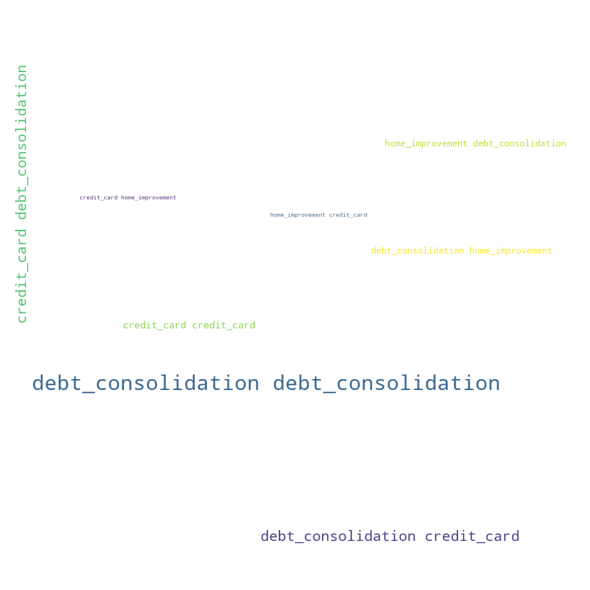

In [544]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in loans.purpose: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Ratio entre el total de deudas mensuales pagadas (excluyendo la hipoteca y el préstamo que se solicita) dividido entre el ingreso mensual
`dti`

In [686]:
contar = loans['dti'].sort_values(ascending = True).value_counts().reset_index(name = 'count')
contar

,index,count
0,19.20,630
1,18.00,618
2,14.40,613
3,13.20,609
4,15.60,599
...,...,...
6751,85.08,1
6752,104.62,1
6753,142.80,1
6754,60.35,1


In [688]:
contar.groupby('count').count().head(15)

,index
count,
1,1769
2,568
3,235
4,99
5,55
6,22
7,13
8,5
9,2


In [547]:
loans.dti.describe()

count    884615.000000
mean         18.903262
std          11.722350
min           0.000000
25%          12.330000
50%          18.220000
75%          24.770000
max         999.000000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti', ylabel='Count'>

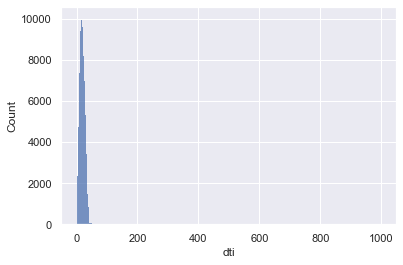

In [661]:
sns.histplot(loans, x = loans['dti'])

### Mes en el que el solicitante abrió la primera línea de crédito
`earliest_cr_line`

In [549]:
loans.earliest_cr_line.describe()

<ipython-input-549-e953113ca67c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  loans.earliest_cr_line.describe()


count                  884876
unique                    712
top       2001-08-01 00:00:00
freq                     6491
first     1934-02-01 00:00:00
last      2014-08-01 00:00:00
Name: earliest_cr_line, dtype: object

### Rango de límite superior e inferior del FICO del solicitante
`fico_range_high` `fico_range_low`

In [550]:
#eliminar?

### Número de meses desde el último impago del socilicitante
`mths_since_last_delinq`

In [551]:
loans.mths_since_last_delinq.describe() 

count    453449.000000
mean         33.659163
std          21.904699
min           0.000000
25%          15.000000
50%          30.000000
75%          49.000000
max         188.000000
Name: mths_since_last_delinq, dtype: float64

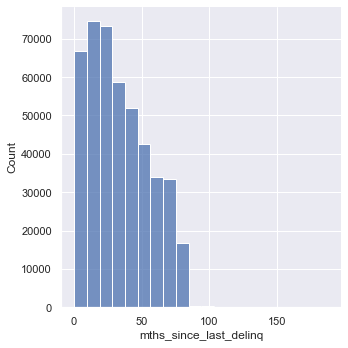

In [552]:
sns.displot(loans, x = loans['mths_since_last_delinq'], bins = 20)

### Número de meses desde la última aparición en el registro público
`mths_since_last_record`

In [553]:
loans.mths_since_last_record.describe() 

count    155100.000000
mean         69.193056
std          26.469788
min           0.000000
25%          51.000000
50%          69.000000
75%          88.000000
max         121.000000
Name: mths_since_last_record, dtype: float64

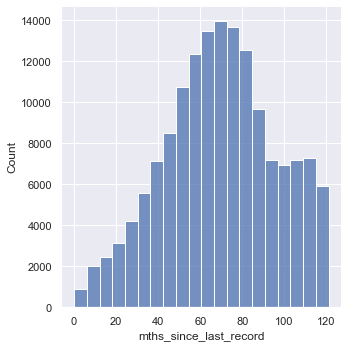

In [554]:
sns.displot(loans, x = loans['mths_since_last_record'], bins = 20)

### Número de cuentas de crédito abiertas
`open_acc`

In [555]:
loans.open_acc.describe() 

count    884876.000000
mean         11.817683
std           5.584597
min           0.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          93.000000
Name: open_acc, dtype: float64

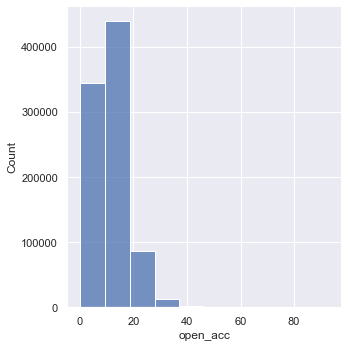

In [556]:
sns.displot(loans, x = loans['open_acc'], bins = 10)

### Número de veces que aparece en el Registro Público (de manera negativa)
`pub_rec`

In [557]:
loans.pub_rec.describe() 

count    884876.000000
mean          0.226261
std           0.622785
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

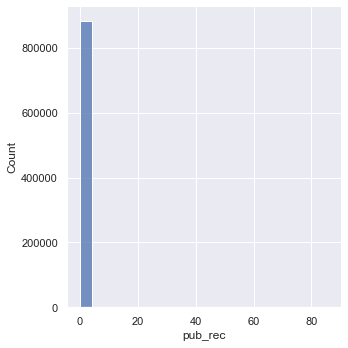

In [558]:
sns.displot(loans, x = loans['pub_rec'], bins = 20)

### Saldo total de las líneas de crédito del solicitante
`revol_bal`

In [559]:
loans.revol_bal.describe() 

count    8.848760e+05
mean     1.698515e+04
std      2.306568e+04
min      0.000000e+00
25%      6.212000e+03
50%      1.162100e+04
75%      2.071500e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

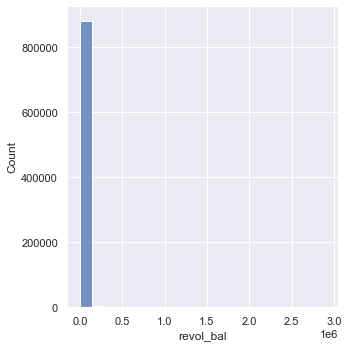

In [560]:
sns.displot(loans, x = loans['revol_bal'], bins = 20)

### Ratio del crédito utilizado
`revol_util`

In [561]:
loans.revol_util.describe() 

count    884387.000000
mean         52.960216
std          24.014491
min           0.000000
25%          35.000000
50%          53.200000
75%          71.400000
max         892.300000
Name: revol_util, dtype: float64

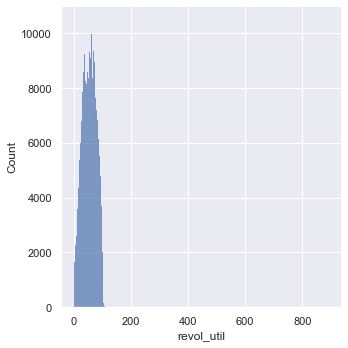

In [562]:
sns.displot(loans, x = loans['revol_util'])

### Número total de cuentas de crédito en el expediente del solicitante
`total_acc`

In [563]:
loans.total_acc.describe() 

count    884876.000000
mean         25.111583
std          12.022320
min           2.000000
25%          16.000000
50%          23.000000
75%          32.000000
max         169.000000
Name: total_acc, dtype: float64

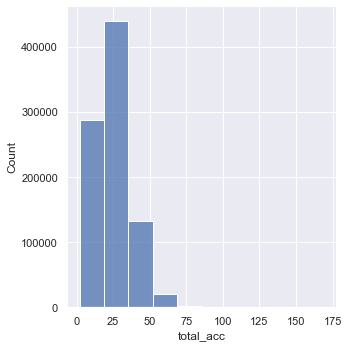

In [564]:
sns.displot(loans, x = loans['total_acc'], bins = 10)

### Rango de límite superior e inferior en el que se encuentra el último FICO del prestatario
`last_fico_range_high` `last_fico_range_low`

In [565]:
loans.last_fico_range_high.describe() 

count    884876.000000
mean        686.138150
std          70.030722
min           0.000000
25%         659.000000
50%         694.000000
75%         729.000000
max         850.000000
Name: last_fico_range_high, dtype: float64

In [566]:
loans.last_fico_range_low.describe() 

count    884876.000000
mean        675.260364
std         104.092204
min           0.000000
25%         655.000000
50%         690.000000
75%         725.000000
max         845.000000
Name: last_fico_range_low, dtype: float64

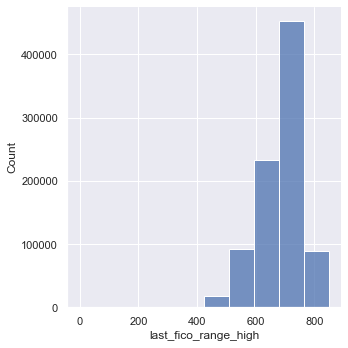

In [567]:
sns.displot(loans, x = loans['last_fico_range_high'], bins = 10)

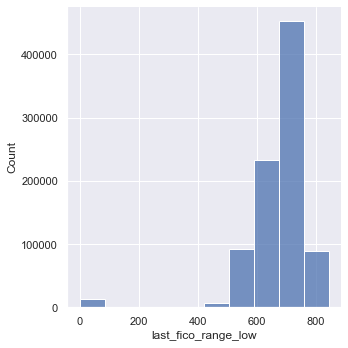

In [568]:
sns.displot(loans, x = loans['last_fico_range_low'], bins = 10)

### Número de cobros en 12 meses (excluyendo gastos médicos)
`collections_12_mths_ex_med`

In [569]:
loans.collections_12_mths_ex_med.describe() 

count    884876.000000
mean          0.019780
std           0.155994
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64

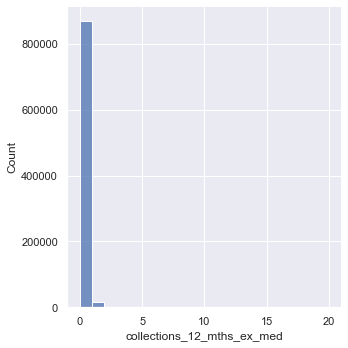

In [570]:
sns.displot(loans, x = loans['collections_12_mths_ex_med'])

### Tipo de solicitud de préstamo
`application_type` individual o conjunta

In [571]:
loans.application_type.describe() 

count         884876
unique             2
top       Individual
freq          863558
Name: application_type, dtype: object

Text(0.5, 1.0, 'Tipo de solicitud del préstamo')

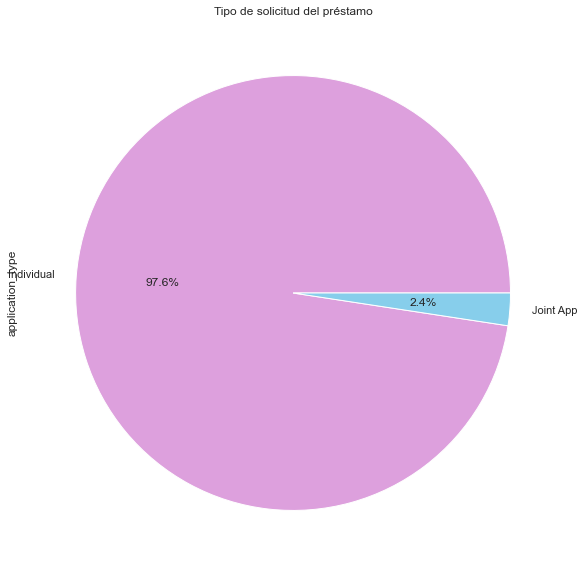

In [572]:
colors = ["plum", "skyblue"]

loans['application_type'].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', colors = colors)
plt.title('Tipo de solicitud del préstamo')


### Número de cuentas actuales en las que el solicitante tiene problemas de solvencia
`acc_now_delinq`

In [573]:
loans.acc_now_delinq.describe() 

count    884876.000000
mean          0.005838
std           0.083013
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: acc_now_delinq, dtype: float64

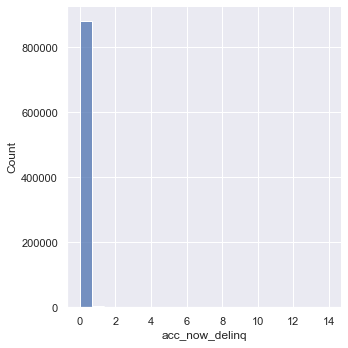

In [574]:
sns.displot(loans, x = loans['acc_now_delinq'])

### Total collection amounts ever owed
`tot_coll_amt`

In [575]:
loans.tot_coll_amt.describe() 

count    8.848760e+05
mean     2.536565e+02
std      9.942521e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64

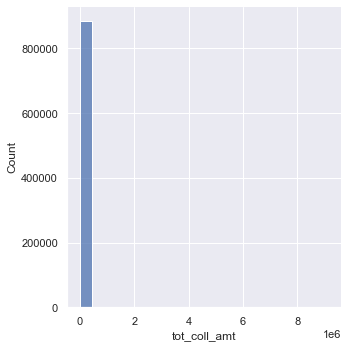

In [576]:
sns.displot(loans, x = loans['tot_coll_amt'])

### Balance total de todas las cuentas en el momento de la solicitud
`tot_cur_bal`

In [577]:
loans.tot_cur_bal.describe() 

count    8.848760e+05
mean     1.413346e+05
std      1.566377e+05
min      0.000000e+00
25%      3.018000e+04
50%      8.060850e+04
75%      2.106550e+05
max      4.447397e+06
Name: tot_cur_bal, dtype: float64

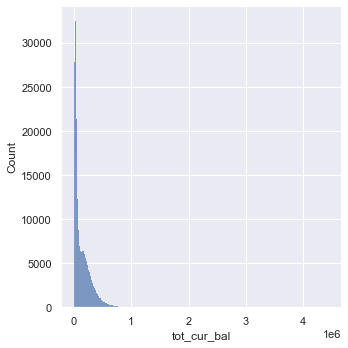

In [578]:
sns.displot(loans, x = loans['tot_cur_bal'])

### Meses desde que se abrió la última cuenta de crédito
`mths_since_rcnt_il`

In [579]:
loans.mths_since_rcnt_il.describe() 

count    242773.000000
mean         21.217005
std          25.439242
min           0.000000
25%           7.000000
50%          14.000000
75%          24.000000
max         433.000000
Name: mths_since_rcnt_il, dtype: float64

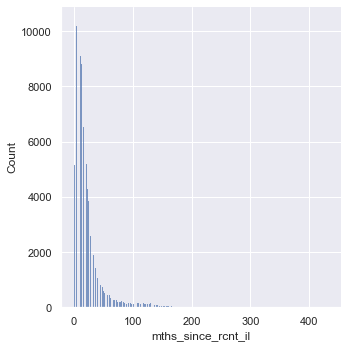

In [580]:
sns.displot(loans, x = loans['mths_since_rcnt_il'])

### Ratio del saldo actual de crédito de buena calidad sobre el crédito total
`il_util`

In [581]:
loans.il_util.describe() 

count    216581.000000
mean         68.935964
std          24.314068
min           0.000000
25%          54.000000
50%          71.000000
75%          86.000000
max         464.000000
Name: il_util, dtype: float64

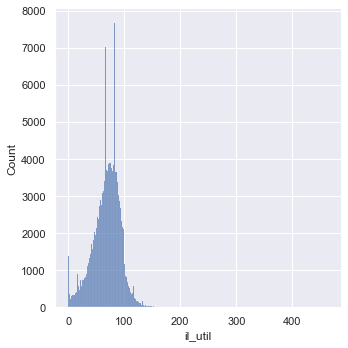

In [582]:
sns.displot(loans, x = loans['il_util'])

### Ratio del saldo actual de crédito de buena calidad sobre el crédito total ???????????
`total_rev_hi_lim`

In [583]:
loans.total_rev_hi_lim.describe() 

count    8.848760e+05
mean     3.314991e+04
std      3.679404e+04
min      0.000000e+00
25%      1.410000e+04
50%      2.430000e+04
75%      4.125000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64

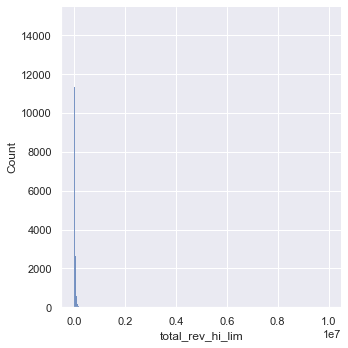

In [584]:
sns.displot(loans, x = loans['total_rev_hi_lim'])

### Número total de líneas de crédito abiertas los últimos 2 años por el solicitante
`acc_open_past_24mths`

In [585]:
loans.acc_open_past_24mths.describe() 

count    884876.000000
mean          4.577076
std           3.120182
min           0.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          64.000000
Name: acc_open_past_24mths, dtype: float64

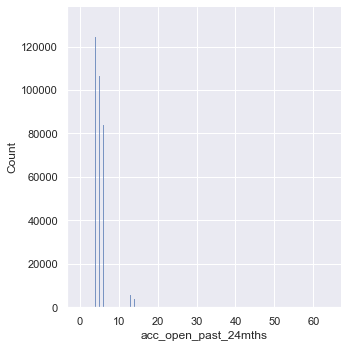

In [586]:
sns.displot(loans, x = loans['acc_open_past_24mths'])

### Saldo medio actual en todas las líneas de crédito del solicitante
`avg_cur_bal`

In [587]:
loans.avg_cur_bal.describe() 

count    884863.000000
mean      13354.806432
std       15985.456430
min           0.000000
25%        3148.000000
50%        7375.000000
75%       18484.000000
max      555925.000000
Name: avg_cur_bal, dtype: float64

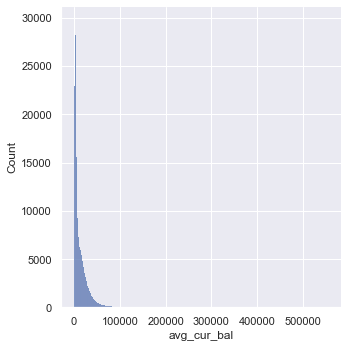

In [588]:
sns.displot(loans, x = loans['avg_cur_bal'])

### Crédito total disponible en tarjetas 
`bc_open_to_buy`

In [589]:
loans.bc_open_to_buy.describe() 

count    875589.000000
mean       9947.905987
std       15123.769706
min           0.000000
25%        1394.000000
50%        4514.000000
75%       12032.000000
max      559912.000000
Name: bc_open_to_buy, dtype: float64

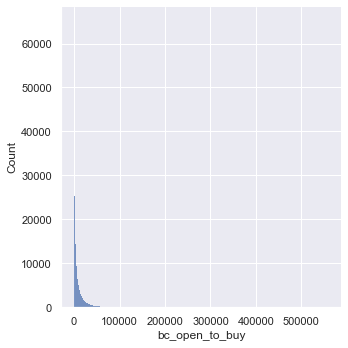

In [590]:
sns.displot(loans, x = loans['bc_open_to_buy'])

### Veces en un año en el que han anulado el préstamo al solicitante por impago
`chargeoff_within_12_mths`

In [591]:
loans.chargeoff_within_12_mths.describe() 

count    884876.000000
mean          0.010181
std           0.115043
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: chargeoff_within_12_mths, dtype: float64

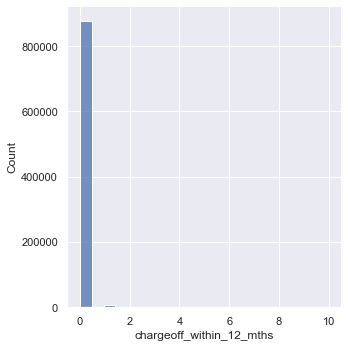

In [592]:
sns.displot(loans, x = loans['chargeoff_within_12_mths'])

### Cantidad vencida adeuda por las cuentas en las que el solicitante está en mora en el moento
`delinq_amnt`

In [593]:
loans.delinq_amnt.describe() 

count    884876.000000
mean         13.942825
std         790.340675
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      249925.000000
Name: delinq_amnt, dtype: float64

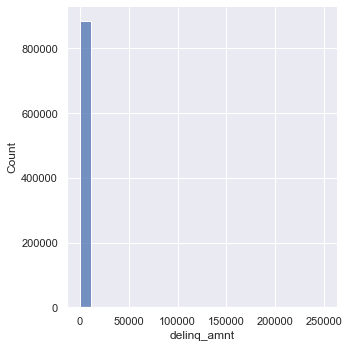

In [594]:
sns.displot(loans, x = loans['delinq_amnt'])

### Meses desde que se abrió la cuenta de crédito más antigua
`mo_sin_old_rev_tl_op`

In [595]:
loans.mo_sin_old_rev_tl_op.describe() 

count    884876.000000
mean        184.482419
std          95.630040
min           2.000000
25%         119.000000
50%         167.000000
75%         235.000000
max         999.000000
Name: mo_sin_old_rev_tl_op, dtype: float64

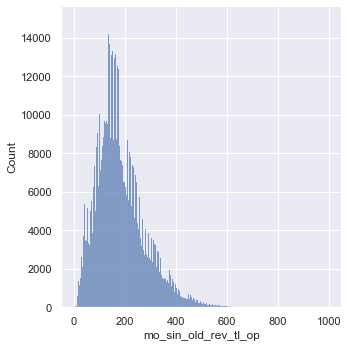

In [596]:
sns.displot(loans, x = loans['mo_sin_old_rev_tl_op'])

###  Meses desde que se abrió la cuenta de crédito más reciente
`mo_sin_rcnt_rev_tl_op`

In [597]:
loans.mo_sin_rcnt_rev_tl_op.describe() 

count    884876.000000
mean         13.541402
std          17.012898
min           0.000000
25%           4.000000
50%           8.000000
75%          16.000000
max         372.000000
Name: mo_sin_rcnt_rev_tl_op, dtype: float64

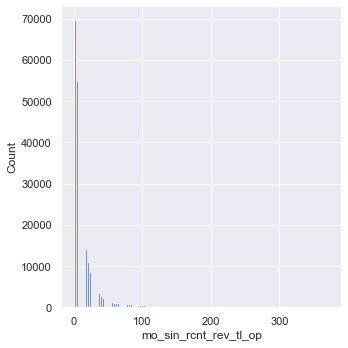

In [598]:
sns.displot(loans, x = loans['mo_sin_rcnt_rev_tl_op'])

### Mesesd esde que se abrió la cuenta más reciente
`mo_sin_rcnt_tl`

In [599]:
loans.mo_sin_rcnt_tl.describe() 

count    884876.000000
mean          8.101970
std           8.982756
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max         263.000000
Name: mo_sin_rcnt_tl, dtype: float64

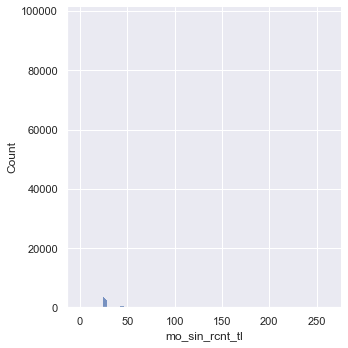

In [600]:
sns.displot(loans, x = loans['mo_sin_rcnt_tl'])

### Número de cuentas hipotecarias
`mort_acc`

In [601]:
loans.mort_acc.describe() 

count    884876.000000
mean          1.653662
std           1.983354
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          94.000000
Name: mort_acc, dtype: float64

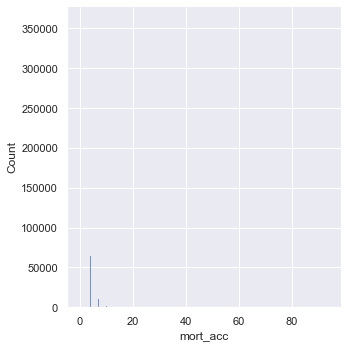

In [602]:
sns.displot(loans, x = loans['mort_acc'])

### Meses desde que el solicitante abrió la cuenta de tarjeta bancaria más reciente
`mths_since_recent_bc`

In [603]:
loans.mths_since_recent_bc.describe() 

count    876113.000000
mean         24.615623
std          31.768216
min           0.000000
25%           6.000000
50%          14.000000
75%          29.000000
max         616.000000
Name: mths_since_recent_bc, dtype: float64

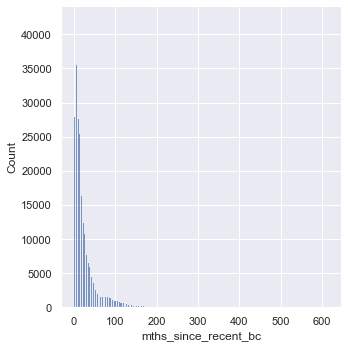

In [604]:
sns.displot(loans, x = loans['mths_since_recent_bc'])

### Meses desde el impago de la tarjeta bancaria más reciente 
`mths_since_recent_bc_dlq`

In [605]:
loans.mths_since_recent_bc_dlq.describe() 

count    225434.000000
mean         39.128632
std          22.793899
min           0.000000
25%          20.000000
50%          37.000000
75%          58.000000
max         195.000000
Name: mths_since_recent_bc_dlq, dtype: float64

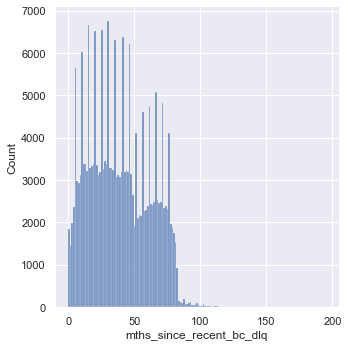

In [606]:
sns.displot(loans, x = loans['mths_since_recent_bc_dlq'])

### Meses desde el último análisis crediticio del solicitante
`mths_since_recent_inq`

In [607]:
loans.mths_since_recent_inq.describe() 

count    792746.000000
mean          6.866936
std           5.930903
min           0.000000
25%           2.000000
50%           5.000000
75%          10.000000
max          25.000000
Name: mths_since_recent_inq, dtype: float64

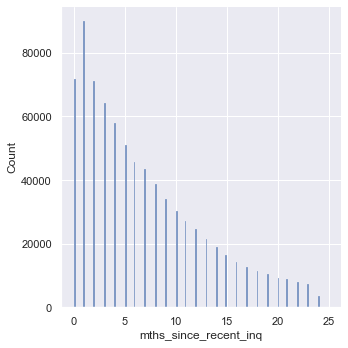

In [608]:
sns.displot(loans, x = loans['mths_since_recent_inq'])

### Meses desde el impago más reciente en una cuenta de crédito
`mths_since_recent_revol_delinq`

In [609]:
loans.mths_since_recent_revol_delinq.describe() 

count    315834.000000
mean         35.274040
std          22.443438
min           0.000000
25%          16.000000
50%          32.000000
75%          52.000000
max         180.000000
Name: mths_since_recent_revol_delinq, dtype: float64

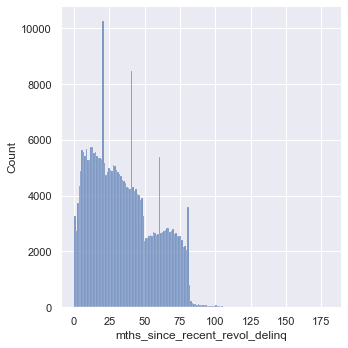

In [610]:
sns.displot(loans, x = loans['mths_since_recent_revol_delinq'])

### Número de cuentas del solicitante en las que alguna vez se ha producido una mora igual o superior a 120 días 
`num_accts_ever_120_pd`

In [611]:
loans.num_accts_ever_120_pd.describe() 

count    884876.000000
mean          0.526488
std           1.362922
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          45.000000
Name: num_accts_ever_120_pd, dtype: float64

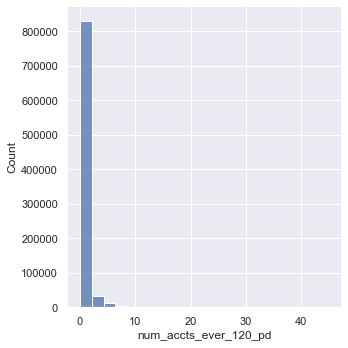

In [612]:
sns.displot(loans, x = loans['num_accts_ever_120_pd'])

### Número de tarjetas bancarias actualmente activas
`num_actv_bc_tl`

In [613]:
loans.num_actv_bc_tl.describe() 

count    884876.000000
mean          3.703895
std           2.283391
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          33.000000
Name: num_actv_bc_tl, dtype: float64

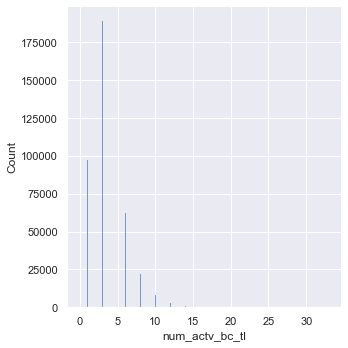

In [614]:
sns.displot(loans, x = loans['num_actv_bc_tl'])

### Número de tarjetas bancarias activas en el momento de la solicitud
`num_actv_rev_tl`

In [615]:
loans.num_actv_rev_tl.describe() 

count    884876.000000
mean          5.767045
std           3.365183
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          63.000000
Name: num_actv_rev_tl, dtype: float64

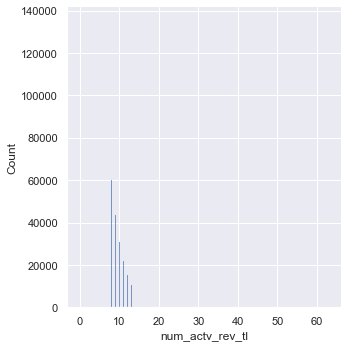

In [616]:
sns.displot(loans, x = loans['num_actv_rev_tl'])

### Number of satisfactory bankcard accounts
`num_bc_sats`

In [617]:
loans.num_bc_sats.describe() 

count    884876.000000
mean          4.751755
std           2.978609
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          63.000000
Name: num_bc_sats, dtype: float64

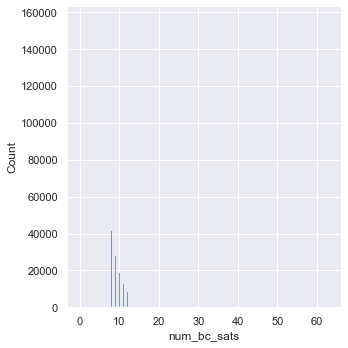

In [618]:
sns.displot(loans, x = loans['num_bc_sats'])

### Number of bankcard accounts
`num_bc_tl`

In [619]:
loans.num_bc_tl.describe() 

count    884876.000000
mean          8.005331
std           4.767887
min           0.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          77.000000
Name: num_bc_tl, dtype: float64

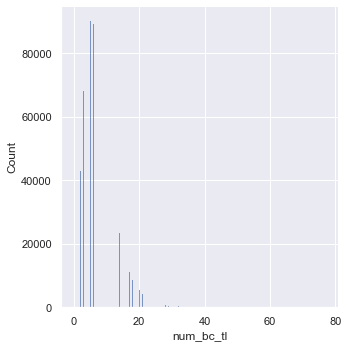

In [620]:
sns.displot(loans, x = loans['num_bc_tl'])

### Number of installment accounts
`num_il_tl`

In [621]:
loans.num_il_tl.describe() 

count    884876.000000
mean          8.606369
std           7.422470
min           0.000000
25%           4.000000
50%           7.000000
75%          11.000000
max         150.000000
Name: num_il_tl, dtype: float64

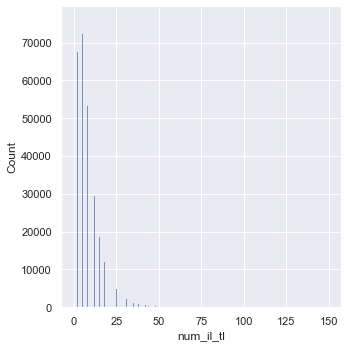

In [622]:
sns.displot(loans, x = loans['num_il_tl'])

### Number of open revolving accounts
`num_op_rev_tl`

In [623]:
loans.num_op_rev_tl.describe() 

count    884876.000000
mean          8.324730
std           4.608801
min           0.000000
25%           5.000000
50%           7.000000
75%          11.000000
max          91.000000
Name: num_op_rev_tl, dtype: float64

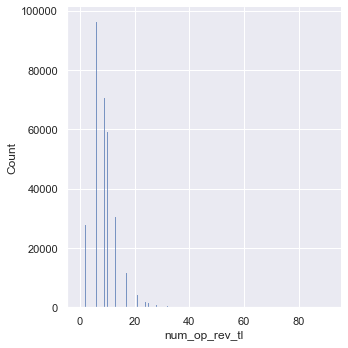

In [624]:
sns.displot(loans, x = loans['num_op_rev_tl'])

### Number of revolving accounts
`num_rev_accts`

In [625]:
loans.num_rev_accts.describe() 

count    884875.000000
mean         14.588231
std           8.159262
min           2.000000
25%           9.000000
50%          13.000000
75%          19.000000
max         143.000000
Name: num_rev_accts, dtype: float64

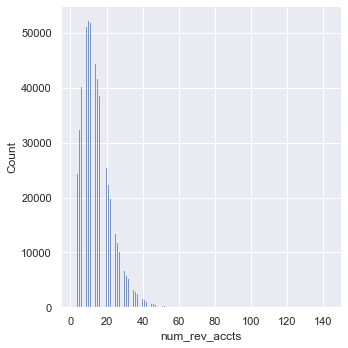

In [626]:
sns.displot(loans, x = loans['num_rev_accts'])

### Number of revolving trades with balance >0
`num_rev_tl_bal_gt_0`

In [627]:
loans.num_rev_tl_bal_gt_0.describe() 

count    884876.000000
mean          5.712248
std           3.281785
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          45.000000
Name: num_rev_tl_bal_gt_0, dtype: float64

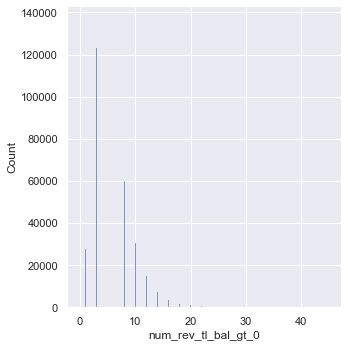

In [628]:
sns.displot(loans, x = loans['num_rev_tl_bal_gt_0'])

### Number of satisfactory accounts
`num_sats`

In [629]:
loans.num_sats.describe() 

count    884876.000000
mean         11.767524
std           5.569736
min           0.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          93.000000
Name: num_sats, dtype: float64

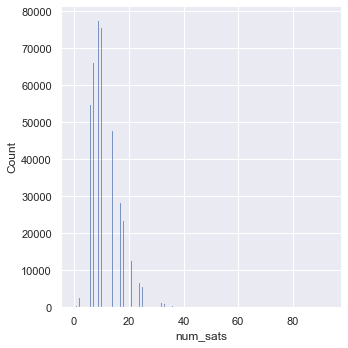

In [630]:
sns.displot(loans, x = loans['num_sats'])

### Number of accounts currently 120 days past due (updated in past 2 months)
`num_tl_120dpd_2m`

In [631]:
loans.num_tl_120dpd_2m.describe() 

count    847073.000000
mean          0.000856
std           0.031907
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: num_tl_120dpd_2m, dtype: float64

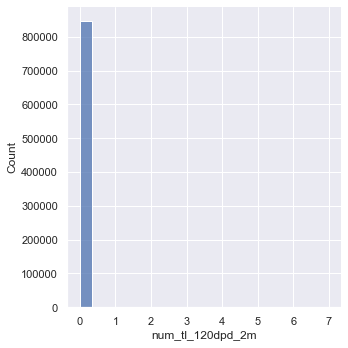

In [632]:
sns.displot(loans, x = loans['num_tl_120dpd_2m'])

### Number of accounts currently 30 days past due (updated in past 2 months)
`num_tl_30dpd`

In [633]:
loans.num_tl_30dpd.describe() 

count    884876.000000
mean          0.003834
std           0.065549
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: num_tl_30dpd, dtype: float64

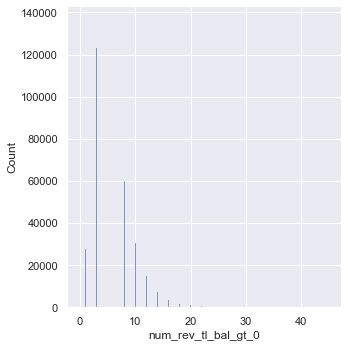

In [634]:
sns.displot(loans, x = loans['num_rev_tl_bal_gt_0'])

### Number of accounts 90 or more days past due in last 24 months
`num_tl_90g_dpd_24m`

In [635]:
loans.num_tl_90g_dpd_24m.describe() 

count    884876.000000
mean          0.094501
std           0.526374
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          42.000000
Name: num_tl_90g_dpd_24m, dtype: float64

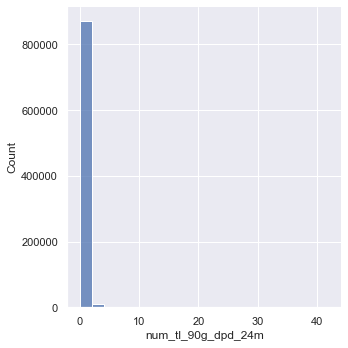

In [636]:
sns.displot(loans, x = loans['num_tl_90g_dpd_24m'])

### Number of accounts opened in past 12 months
`num_tl_op_past_12m`

In [637]:
loans.num_tl_op_past_12m.describe() 

count    884876.000000
mean          2.096012
std           1.785976
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          30.000000
Name: num_tl_op_past_12m, dtype: float64

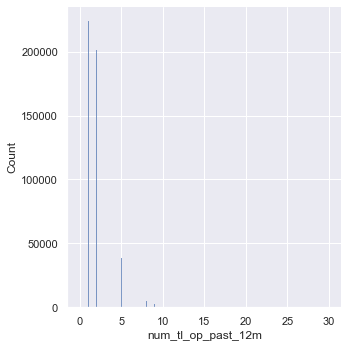

In [638]:
sns.displot(loans, x = loans['num_tl_op_past_12m'])

### Percent of trades never delinquent
`pct_tl_nvr_dlq`

In [639]:
loans.pct_tl_nvr_dlq.describe() 

count    884876.000000
mean         93.895321
std           9.027753
min           0.000000
25%          90.900000
50%          97.500000
75%         100.000000
max         100.000000
Name: pct_tl_nvr_dlq, dtype: float64

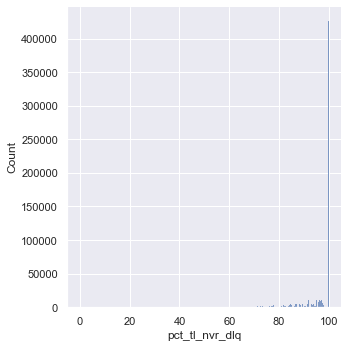

In [640]:
sns.displot(loans, x = loans['pct_tl_nvr_dlq'])

### Percentage of all bankcard accounts > 75% of limit.
`percent_bc_gt_75`

In [641]:
loans.percent_bc_gt_75.describe() 

count    875196.000000
mean         46.447254
std          36.000607
min           0.000000
25%          14.300000
50%          50.000000
75%          75.000000
max         100.000000
Name: percent_bc_gt_75, dtype: float64

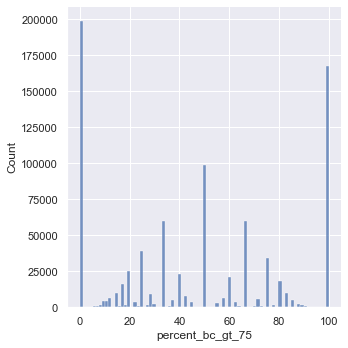

In [642]:
sns.displot(loans, x = loans['percent_bc_gt_75'])

### Number of public record bankruptcies
`pub_rec_bankruptcies`

In [643]:
loans.pub_rec_bankruptcies.describe() 

count    884876.000000
mean          0.134489
std           0.380002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: pub_rec_bankruptcies, dtype: float64

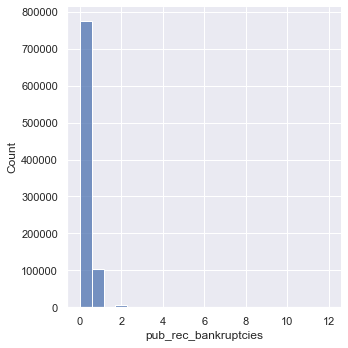

In [644]:
sns.displot(loans, x = loans['pub_rec_bankruptcies'])

### Number of tax liens
`tax_liens`

In [645]:
loans.tax_liens.describe() 

count    884876.000000
mean          0.060247
std           0.422684
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          85.000000
Name: tax_liens, dtype: float64

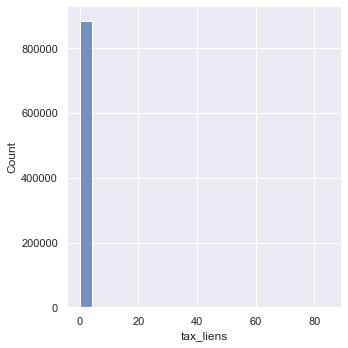

In [646]:
sns.displot(loans, x = loans['tax_liens'])

### Total high credit/credit limit
`tot_hi_cred_lim`

In [647]:
loans.tot_hi_cred_lim.describe() 

count    8.848760e+05
mean     1.749450e+05
std      1.769136e+05
min      0.000000e+00
25%      5.042700e+04
50%      1.128455e+05
75%      2.527782e+05
max      9.999999e+06
Name: tot_hi_cred_lim, dtype: float64

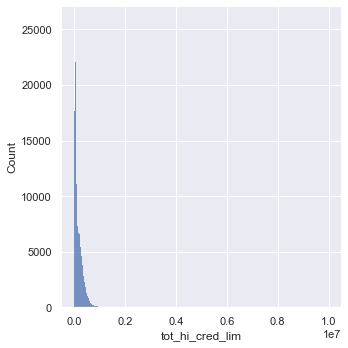

In [648]:
sns.displot(loans, x = loans['tot_hi_cred_lim'])

### Total credit balance excluding mortgage
`total_bal_ex_mort`

In [649]:
loans.total_bal_ex_mort.describe() 

count    8.848760e+05
mean     5.125013e+04
std      4.894820e+04
min      0.000000e+00
25%      2.171900e+04
50%      3.850550e+04
75%      6.446900e+04
max      3.408095e+06
Name: total_bal_ex_mort, dtype: float64

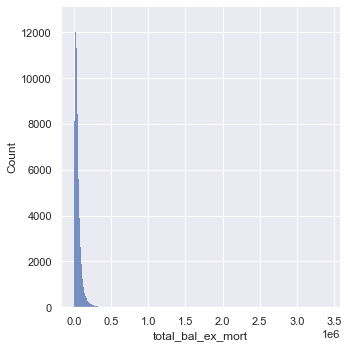

In [650]:
sns.displot(loans, x = loans['total_bal_ex_mort'])

### Total bankcard high credit/credit limit
`total_bc_limit`

In [651]:
loans.total_bc_limit.describe() 

count    8.848760e+05
mean     2.186362e+04
std      2.186621e+04
min      0.000000e+00
25%      7.700000e+03
50%      1.520000e+04
75%      2.850000e+04
max      1.090700e+06
Name: total_bc_limit, dtype: float64

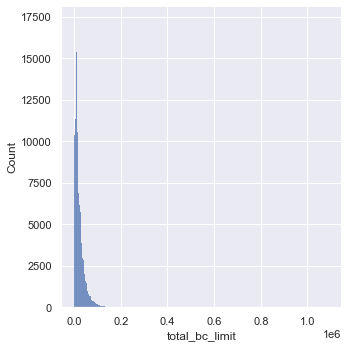

In [652]:
sns.displot(loans, x = loans['total_bc_limit'])

### Total installment high credit/credit limit
`total_il_high_credit_limit`

In [653]:
loans.total_il_high_credit_limit.describe() 

count    8.848760e+05
mean     4.322460e+04
std      4.396783e+04
min      0.000000e+00
25%      1.516000e+04
50%      3.259750e+04
75%      5.793000e+04
max      2.101913e+06
Name: total_il_high_credit_limit, dtype: float64

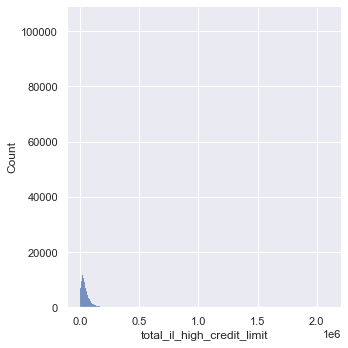

In [654]:
sns.displot(loans, x = loans['total_il_high_credit_limit'])

### The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY
`disbursement_method`

In [655]:
loans.disbursement_method.describe() 

count     884876
unique         2
top         Cash
freq      884615
Name: disbursement_method, dtype: object

Text(0.5, 1.0, 'Forma de recibir el préstamo')

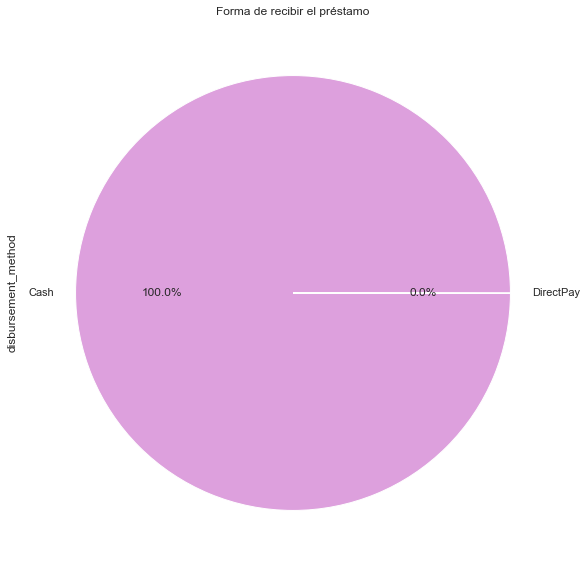

In [656]:
colors = ["plum", "skyblue"]

loans['disbursement_method'].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', colors = colors)
plt.title('Forma de recibir el préstamo')
